In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

### Carregamento e junção dos dados

In [2]:
resultados_escola_pd = pd.read_csv('../dados/TS_RESULTADO_ESCOLA.csv', delimiter=';')
questionario_escola_pd = pd.read_csv('../dados/TS_QUEST_ESCOLA.csv', delimiter=';')
join_columns = ['ID_PROVA_BRASIL', 'ID_UF', 'ID_MUNICIPIO', 'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'ID_ESCOLA']
escolas_info_pd = pd.merge(questionario_escola_pd, resultados_escola_pd, on=join_columns, how='outer')
escolas_info_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72808 entries, 0 to 72807
Data columns (total 80 columns):
ID_PROVA_BRASIL          72808 non-null int64
ID_UF                    72808 non-null int64
ID_MUNICIPIO             72808 non-null int64
ID_ESCOLA                72808 non-null int64
ID_DEPENDENCIA_ADM       72808 non-null int64
ID_LOCALIZACAO           72808 non-null int64
IN_PREENCHIMENTO         72808 non-null int64
TX_RESP_Q001             72808 non-null object
TX_RESP_Q002             72808 non-null object
TX_RESP_Q003             72808 non-null object
TX_RESP_Q004             72808 non-null object
TX_RESP_Q005             72808 non-null object
TX_RESP_Q006             72808 non-null object
TX_RESP_Q007             72808 non-null object
TX_RESP_Q008             72808 non-null object
TX_RESP_Q009             72808 non-null object
TX_RESP_Q010             72808 non-null object
TX_RESP_Q011             72808 non-null object
TX_RESP_Q012             72808 non-null object
TX_RE

In [3]:
def questoes_ids():
    questao_base = 'TX_RESP_Q{}'
    for i in range(1, 67):
        yield questao_base.format(str(i).zfill(3))

In [4]:
descricoes = [
    'Avalie o estado de conservação dos itens e equipamentos do prédio - telhado',
    'Avalie o estado de conservação dos itens e equipamentos do prédio - paredes',
    'Avalie o estado de conservação dos itens e equipamentos do prédio - piso',
    'Avalie o estado de conservação dos itens e equipamentos do prédio -  entrada do prédio',
    'Avalie o estado de conservação dos itens e equipamentos do prédio - pátio',
    'Avalie o estado de conservação dos itens e equipamentos do prédio - corredores',
    'Avalie o estado de conservação dos itens e equipamentos do prédio - salas de aula',
    'Avalie o estado de conservação dos itens e equipamentos do prédio - portas',
    'Avalie o estado de conservação dos itens e equipamentos do prédio - janelas',
    'Avalie o estado de conservação dos itens e equipamentos do prédio - banheiros',
    'Avalie o estado de conservação dos itens e equipamentos do prédio - cozinha',
    'Avalie o estado de conservação dos itens e equipamentos do prédio - instalações hidráulicas',
    'Avalie o estado de conservação dos itens e equipamentos do prédio - instalações elétricas',
    'Avalie os seguintes aspectos em relação às salas de aula: (considere sim quando mais de 50% das salas de aula apresentarem o aspecto questionado) - são iluminadas? ',
    'Avalie os seguintes aspectos em relação às salas de aula: (considere sim quando mais de 50% das salas de aula apresentarem o aspecto questionado) - são arejadas? ',
    'Avalie os seguintes aspectos em relação à segurança da escola e dos alunos: há muros, grades ou cercas em condições de garantir a segurança dos alunos? (caso existam buracos ou aberturas que permitam o acesso de estranhos, responder não)',
    'Avalie os seguintes aspectos em relação à segurança da escola e dos alunos: há controle de entrada e saída de alunos?',
    'Avalie os seguintes aspectos em relação à segurança da escola e dos alunos: há controle de entrada de pessoas estranhas na escola?',
    'Avalie os seguintes aspectos em relação à segurança da escola e dos alunos: os portões que dão acesso à parte externa permanecem trancados durante o horário de funcionamento da escola?',
    'Avalie os seguintes aspectos em relação à segurança da escola e dos alunos: há algum tipo de vigilância para o período diurno?',
    'Avalie os seguintes aspectos em relação à segurança da escola e dos alunos: há algum tipo de vigilância para o período noturno?',
    'Avalie os seguintes aspectos em relação à segurança da escola e dos alunos: há algum tipo de vigilância para os finais de semana e feriados?',
    'Avalie os seguintes aspectos em relação à segurança da escola e dos alunos: há algum esquema de policiamento para inibição de furtos, roubos e outras formas de violência?',
    'Avalie os seguintes aspectos em relação à segurança da escola e dos alunos: há algum esquema de policiamento para inibição de tráfico de tóxicos/ drogas dentro da escola?',
    'Avalie os seguintes aspectos em relação à segurança da escola e dos alunos: há algum esquema de policiamento para inibição de tráfico de tóxicos/ drogas nas imediações da escola?',
    'Avalie os seguintes aspectos em relação à segurança da escola e dos alunos: a escola possui algum sistema de proteção contra incêndio (alarme de fumaça e temperatura, extintores contra incêndio dentro do prazo de validade, mangueira etc.)?',
    'Avalie os seguintes aspectos em relação à segurança da escola e dos alunos: as salas onde são guardados os equipamentos mais caros (computadores, projetores, televisão, vídeo etc.) Possuem dispositivos para serem trancados (cadeados, grades, travas, trancas etc.)? ',
    'Avalie os seguintes aspectos em relação à segurança da escola e dos alunos: a escola apresenta sinais de depredação (vidros, portas e janelas quebradas, lâmpadas estouradas etc.)?',
    'Avalie os seguintes aspectos em relação à segurança da escola e dos alunos: há uma boa iluminação do lado de fora da escola?',
    'Avalie os seguintes aspectos em relação à segurança da escola e dos alunos: a escola adota alguma medida de segurança para para proteger os alunos nas suas imediações?',
    'Indique se nesta escola existem ou não os recursos apontados e quais são suas condiçoes de uso. Computadores para uso dos alunos. ',
    'Indique se nesta escola existem ou não os recursos apontados e quais são suas condiçoes de uso. Acesso à internet para uso dos alunos.',
    'Indique se nesta escola existem ou não os recursos apontados e quais são suas condiçoes de uso. Computadores para uso dos professores.',
    'Indique se nesta escola existem ou não os recursos apontados e quais são suas condiçoes de uso. Acesso à internet para uso dos professores.',
    'Indique se nesta escola existem ou não os recursos apontados e quais são suas condiçoes de uso. Computadores exclusivamente para o uso administrativo.',
    'Indique se nesta escola existem ou não os recursos apontados e quais são suas condiçoes de uso. Fitas de vídeo ou dvd (educativas).',
    'Indique se nesta escola existem ou não os recursos apontados e quais são suas condiçoes de uso. Fitas de vídeo ou dvd (lazer).',
    'Indique se nesta escola existem ou não os recursos apontados e quais são suas condiçoes de uso. Máquina copiadora.',
    'Indique se nesta escola existem ou não os recursos apontados e quais são suas condiçoes de uso. Impressora.',
    'Indique se nesta escola existem ou não os recursos apontados e quais são suas condiçoes de uso. Retroprojetor.',
    'Indique se nesta escola existem ou não os recursos apontados e quais são suas condiçoes de uso. Projetor de slides.',
    'Indique se nesta escola existem ou não os recursos apontados e quais são suas condiçoes de uso. Videocassete ou dvd.',
    'Indique se nesta escola existem ou não os recursos apontados e quais são suas condiçoes de uso. Televisão.',
    'Indique se nesta escola existem ou não os recursos apontados e quais são suas condiçoes de uso. Mimeógrafo.',
    'Indique se nesta escola existem ou não os recursos apontados e quais são suas condiçoes de uso. Câmera fotográfica.',
    'Indique se nesta escola existem ou não os recursos apontados e quais são suas condiçoes de uso. Antena parabólica.',
    'Indique se nesta escola existem ou não os recursos apontados e quais são suas condiçoes de uso. Linha telefônica.',
    'Indique se nesta escola existem ou não os recursos apontados e quais são suas condiçoes de uso. Aparelho de fax.',
    'Indique se nesta escola existem ou não os recursos apontados e quais são suas condiçoes de uso. Aparelho de som.',
    'Indique se nesta escola existem ou não os recursos apontados e quais são suas condiçoes de uso. Biblioteca.',
    'Indique se nesta escola existem ou não os recursos apontados e quais são suas condiçoes de uso. Quadra de esportes.',
    'Indique se nesta escola existem ou não os recursos apontados e quais são suas condiçoes de uso. Laboratório.',
    'Indique se nesta escola existem ou não os recursos apontados e quais são suas condiçoes de uso. Auditório.',
    'Indique se nesta escola existem ou não os recursos apontados e quais são suas condiçoes de uso. Sala para atividades de música.',
    'Indique se nesta escola existem ou não os recursos apontados e quais são suas condiçoes de uso. Sala para atividades de artes plásticas.',
    'Indique se nesta escola existem ou não os recursos apontados e quais são suas condiçoes de uso. Sala de leitura.',
    'Em relação à biblioteca ou sala de leitura:  possui acervo diversificado que desperte o interesse dos alunos.',
    'Em relação à biblioteca ou sala de leitura:  possui brinquedoteca.',
    'Em relação à biblioteca ou sala de leitura:  possui espaço para estudos coletivos.',
    'Em relação à biblioteca ou sala de leitura:  os livros podem ser manuseados e emprestados.',
    'Em relação à biblioteca ou sala de leitura:  a comunidade pode  utilzar o espaço e os livros.',
    'Em relação à biblioteca ou sala de leitura:  o espaço é arejado e bem iluminado.',
    'Em relação à biblioteca ou sala de leitura:  existe uma pessoa responsável pelo atendimento na biblioteca ou na sala de leitura?',
    'Os usuários da biblioteca (ou sala de leitura) levam livros para casa? Os alunos.',
    'Os usuários da biblioteca (ou sala de leitura) levam livros para casa? Os professores.',
    'Os usuários da biblioteca (ou sala de leitura) levam livros para casa? Os membros da comunidade.'
]
dicionario_questoes_escola = {
    questao_id: descricoes[index] for (index, questao_id) in enumerate(questoes_ids())
}

### Limpeza inicial dos dados

In [5]:
def codificar_questoes(questionario_pd):
    questionario_tratado_pd = questionario_pd.copy()
    for questao in questoes_ids():
        questionario_tratado_pd[questao] = questionario_pd[questao].map({'A': 3, 'B': 2, 'C': 1, 'D': 0}).fillna(-1)
    
    return questionario_tratado_pd


def limpar_scores(questionario_pd):
    questionario_tratado_pd = questionario_pd.copy()
    ids_scores = ['MEDIA_LP', 'MEDIA_MT']
    
    for id_score in ids_scores:
        questionario_tratado_pd[id_score] = questionario_pd[id_score].str.strip().str.replace(',', '.').str.replace('^$', '-1').astype(float)
    
    return questionario_tratado_pd

In [6]:
escolas_info_clean_pd = limpar_scores(codificar_questoes(escolas_info_pd))

### Checagem de correlações

In [7]:
escolas_questoes_lp = escolas_info_clean_pd[list(questoes_ids()) + ['MEDIA_LP']]
media_lp_corrs = escolas_questoes_lp.corr()['MEDIA_LP']
dez_questoes_com_maiores_correlacoes = media_lp_corrs.sort_values(ascending=False).index[1:11]

[dicionario_questoes_escola[q] for q in dez_questoes_com_maiores_correlacoes]

['Indique se nesta escola existem ou não os recursos apontados e quais são suas condiçoes de uso. Linha telefônica.',
 'Indique se nesta escola existem ou não os recursos apontados e quais são suas condiçoes de uso. Aparelho de fax.',
 'Indique se nesta escola existem ou não os recursos apontados e quais são suas condiçoes de uso. Quadra de esportes.',
 'Indique se nesta escola existem ou não os recursos apontados e quais são suas condiçoes de uso. Biblioteca.',
 'Indique se nesta escola existem ou não os recursos apontados e quais são suas condiçoes de uso. Acesso à internet para uso dos alunos.',
 'Os usuários da biblioteca (ou sala de leitura) levam livros para casa? Os alunos.',
 'Em relação à biblioteca ou sala de leitura:  existe uma pessoa responsável pelo atendimento na biblioteca ou na sala de leitura?',
 'Indique se nesta escola existem ou não os recursos apontados e quais são suas condiçoes de uso. Retroprojetor.',
 'Os usuários da biblioteca (ou sala de leitura) levam livro

### Distribuição das médias em Língua Portuguesa

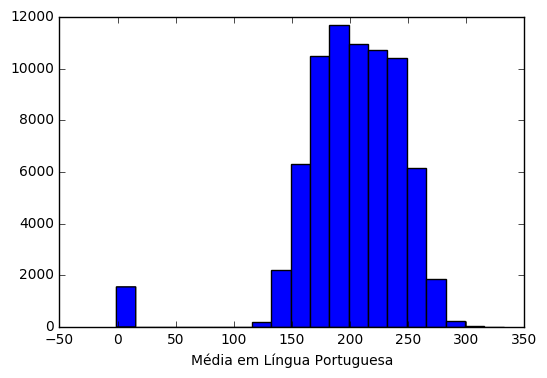

In [8]:
plt.hist(escolas_info_clean_pd['MEDIA_LP'], bins=20)
plt.xlabel('Média em Língua Portuguesa')
plt.show()

### Gráfico de correlação entre Qualidade da Biblioteca e Média em Língua Portuguesa

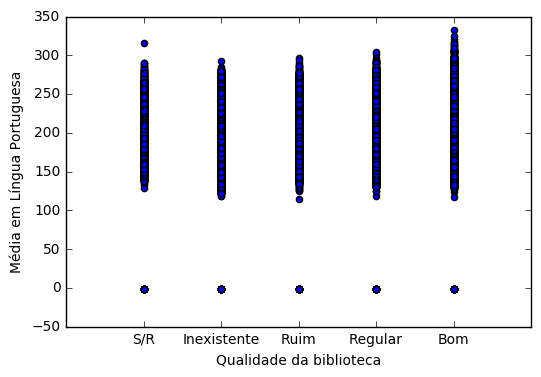

In [9]:
# Qualidade da biblioteca, de acordo com o dicionario de dados, encontra-se no campo TX_RESP_Q050
plt.scatter(escolas_info_clean_pd['TX_RESP_Q050'], escolas_info_clean_pd['MEDIA_LP'])
plt.xlabel('Qualidade da biblioteca')
plt.ylabel('Média em Língua Portuguesa')
plt.xticks([-1, 0, 1, 2, 3], ['S/R', 'Inexistente', 'Ruim', 'Regular', 'Bom'])
plt.show()